In [1]:
import numpy as np # for Linear Algebra
import pandas as pd # For data processing and CSV I/O of library
import warnings # Current version of Seaborn generates a bunch of warnings that will be ignored.
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

#Data Visualiation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white',color_codes=True)

In [2]:
iris =  pd.read_csv('iris.csv')

#### Outlayer view of Iris

In [3]:
print('First five rows')
iris.head()# Few observations in Iris data set

First five rows


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
print('shape and size:',iris.shape,'and' ,iris.size ) # printing shape and size

shape and size: (150, 5) and 750


In [5]:
iris['species'].value_counts() # counting number of species of there types 

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: species, dtype: int64

As we can see above data distribution of data points in each class is equal so Iris is a ***balanced dataset*** as the number of data points for every class is 50.

In [6]:
iris.info() # We can see that all of the features except Species are of float datatype and Species is of object/categorical datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [7]:
iris.isnull().sum() # finding if any null values are there, if yes then, sum!

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
summary = iris.describe()# Totol description for the data set
summary.transpose()

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


*From the above summary, we can see there is huge range in the size of the Sepal Length and Petal Length. We will use a scatter plot to see if the size is related to the species of Iris*

## Data Visualization
We now have a basic idea about the data. We need to extend that with some visualizations.
We are going to look at two types of plots:

- Univariate plots to better understand each attribute, without dealing with causes or relationship       
- Bivariate/Multivariate plots to better understand the relationships between attributes.

## Bivariate/Multivariate Analysis
***
##### We will start with Bivariate analysis, we will use **2-D scatter plot**  
*The main idea is taking 2 features at a time then after that identifying that if we could be able to diffentiate the three classes of flower in the dataset*

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


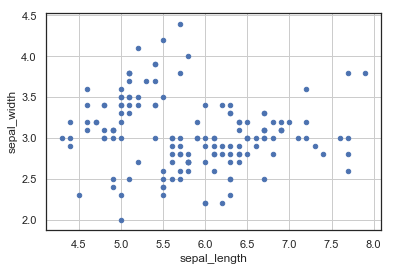

In [9]:
iris.plot(kind = 'scatter', x = 'sepal_length', y = 'sepal_width')
plt.grid()
plt.show()

In the above graph, its a bit difficult to differentiate the flowers due to same color.  
We will use seaborn to make it possible 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


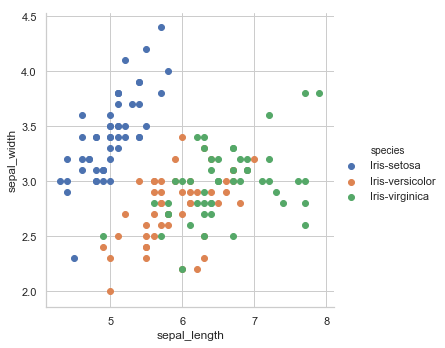

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


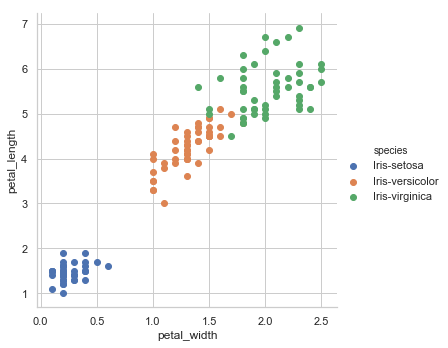

In [10]:
sns.set(style = 'whitegrid')
sns.FacetGrid(iris, hue = 'species', size = 5)  \
    .map(plt.scatter,'sepal_length','sepal_width')  \
    .add_legend()
plt.show()

sns.set_style('whitegrid')
sns.FacetGrid(iris,hue = 'species', size = 5)  \
    .map(plt.scatter,'petal_width','petal_length')  \
    .add_legend()
plt.show()

Here we can build a simple model using ***if-elif conditions*** by seperating them on basis of there petal length and width

```
if (petal_width >= 0 && petal_width <= 0.7) && (petal_length>=0 && petal_length<=2):
    print('Setosa')
elif (petal_width>=1 && petal_width<1.6 )&&(petal_length>=3 && petal_length<5 ):
    print('versicolor')
elif (petal_width>=1.6 && petal_width<2.5 )&&(petal_length>=5 && petal_length<=7 ):
    print('virginica')
else:
    print('Not amoung the three flowers')
```

##### From the above graph, when we plot with all four variables only petal_length vs petal_width graph helps to distinguish the Setosa flower from other two. Now we have to try all such possible cases with 4 features avalaible by plotting taking 2 at a time. i.e., 4c2 = 6 such possible combinations.
##### However, now we will use ***pair plot*** so that we could find any other insights

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


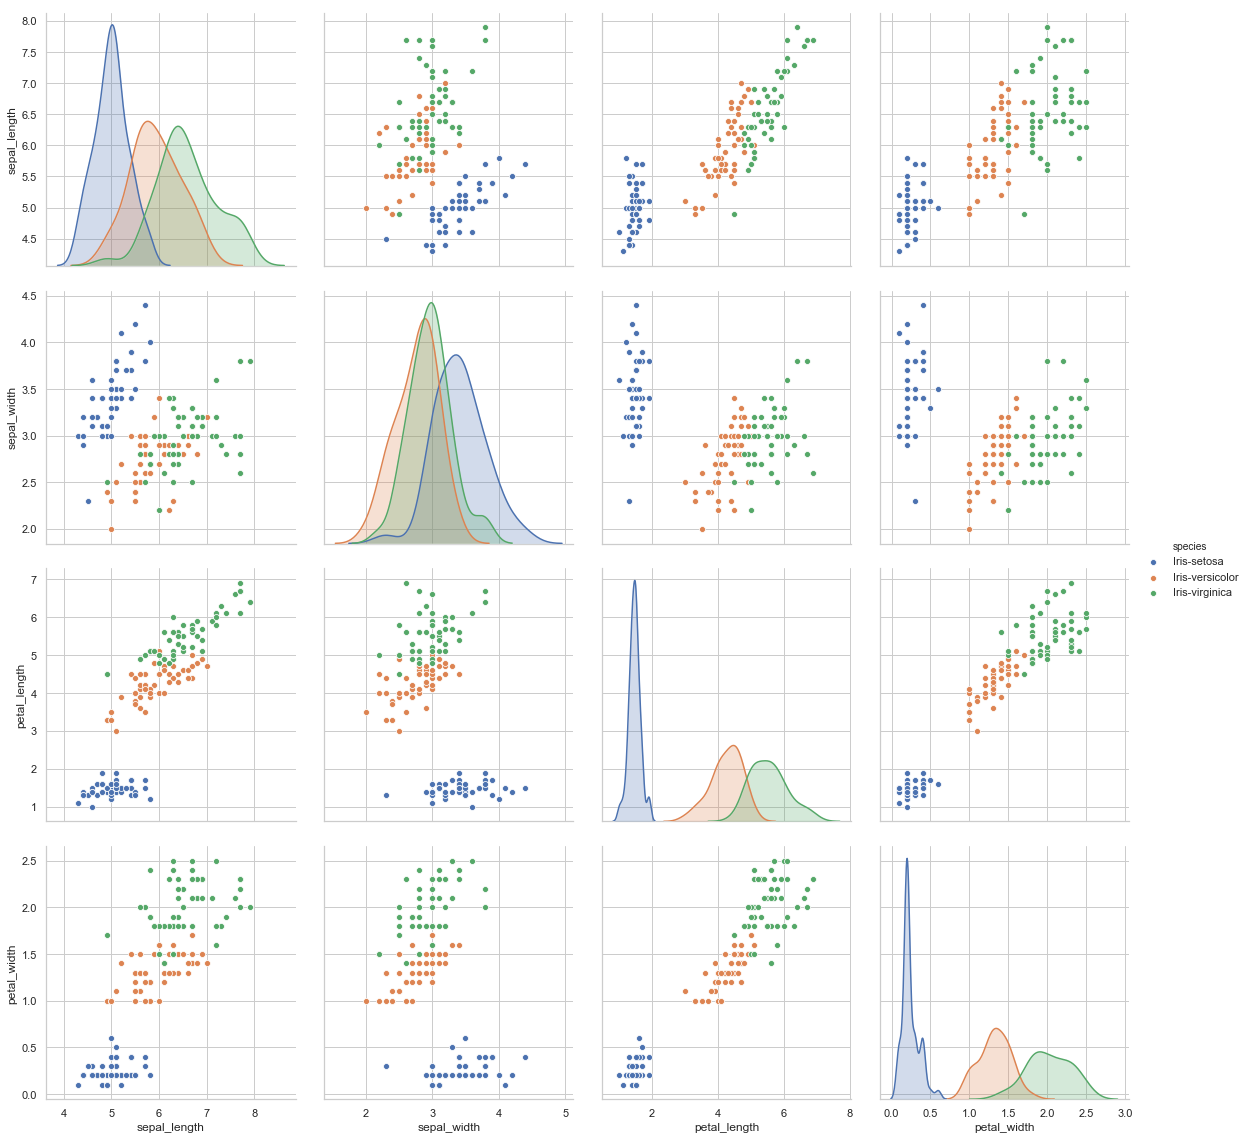

In [11]:
sns.set_style('whitegrid')
sns.pairplot(iris,hue = 'species', size = 4)
plt.show()

#### Observations - For the above data, pair plot are fairly to be understand if the variable are less(4c2 = 6).
**If the variable are more than 6(6c2 = 15), deriving insights Pair plots will become a complex part**

## Univariate Analysis 
***
**Univariate analysis** is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable. It doesn’t deal with causes or relationships (unlike regression) and it’s major purpose is to describe; it takes data, summarizes that data and finds patterns in the data.

**Plots used** -
    - 1-D scatter plot
    - Histogram
    - Probability Density Function(PDF) and Cumulative Distribution Function (CDF)
    - Box plot
    - Violin plot
    - Swarm plot

#### 1 -D Scatter plot
In this plot, we are taking either x or y coordinate of a feature of plotting point and making the other coordinate as zero

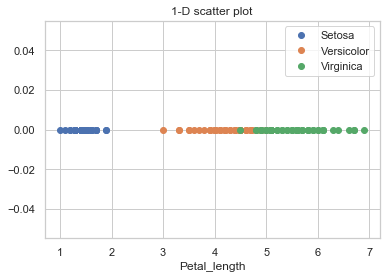

In [12]:
iris_setosa = iris.loc[iris['species'] == 'Iris-setosa'] # seperating each species from the data
iris_versicolor = iris.loc[iris['species']=='Iris-versicolor']# seperating each species from the data
iris_virginica = iris.loc[iris['species'] == 'Iris-virginica']# seperating each species from the data

#Creating the plot
plt.plot(iris_setosa['petal_length'],np.zeros_like(iris_setosa['petal_length']),'o')
plt.plot(iris_versicolor['petal_length'],np.zeros_like(iris_versicolor['petal_length']),'o')
plt.plot(iris_virginica['petal_length'],np.zeros_like(iris_virginica['petal_length']),'o')
plt.legend(['Setosa','Versicolor','Virginica'])
plt.xlabel('Petal_length')
plt.title('1-D scatter plot')
plt.show()

From above, its clearly visible that data points are overlapping, for such cases ***Distribution plots*** helps us to understand better

#### Distribution plots 
Distribution plots are used to visually assess how the data points are distributed with respect to its frequency.
*  Usually the data points are grouped into bins and the height of the bars representing each group increases with increase in the number of data points lie within that group. (histogram).
* Probability Density Function (PDF) is the probability that the variable takes a value x. (smoothed version of the histogram).
* Kernel Density Estimate (KDE) is the way to estimate the PDF. The area under the KDE curve is 1.  


*Here the height of the bar denotes the percentage of data points under the corresponding group*

#### Histogram

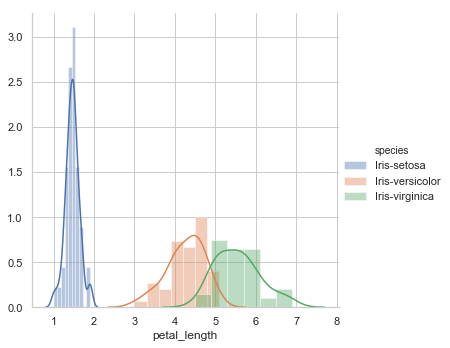

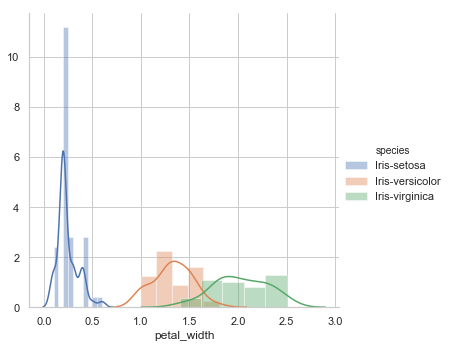

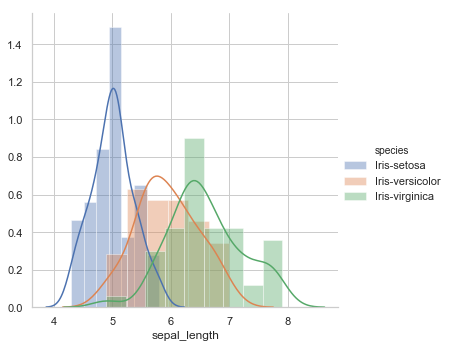

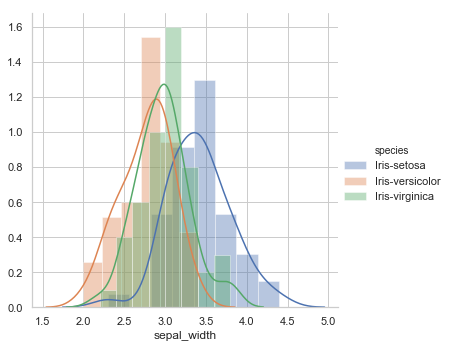

In [16]:
sns.FacetGrid(iris,hue="species",height=5).map(sns.distplot,"petal_length").add_legend()
sns.FacetGrid(iris,hue="species",height=5).map(sns.distplot,"petal_width").add_legend()
sns.FacetGrid(iris,hue="species",height=5).map(sns.distplot,"sepal_length").add_legend()
sns.FacetGrid(iris,hue="species",height=5).map(sns.distplot,"sepal_width").add_legend()
plt.show()

**Observations:-**  
* By using petal length, we can seperate Setosa.  
* In Petal width, Setosa is not properly distrubuted.
* Remaining Sepal length and width, we can't do anything as whole data is messed up and we cannot seperate them.
* So we can choose petal length's data distrubution for analysis.  


Therefore, for analysing the data, the below feature can be considered.  
***PL > PW >> SL >> SW***  


#### PDF and CDF
Probability Densitiy Function (**PDF**) - It shows the probability of a data point lie under the curve.  
Cumulative Distribution Function(**CDF**) - The percent of the data points lies under a limit.

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


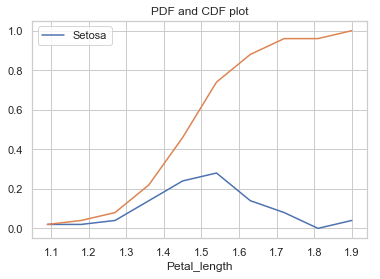

In [23]:
counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins = 10, density = True)

pdf = counts/sum(counts)
print(pdf)
print(bin_edges)

#computing CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(['Setosa'])
plt.xlabel('Petal_length')
plt.title('PDF and CDF plot')
plt.show()

##### Combaining all three

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]


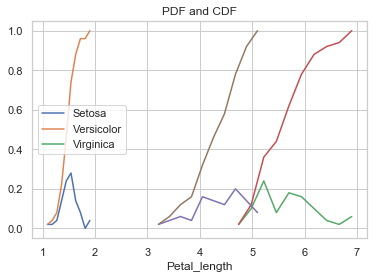

In [21]:
# for Setosa
counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins = 10, density=True)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
print(pdf)
print(bin_edges)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:],cdf)

# for Virginica
counts, bin_edges = np.histogram(iris_virginica['petal_length'],bins = 10, density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
print(pdf)
print(bin_edges)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

# For Versicolor
counts, bin_edges = np.histogram(iris_versicolor['petal_length'], bins = 10, density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.legend(['Setosa','Versicolor','Virginica'])
plt.xlabel('Petal_length')
plt.title('PDF and CDF')
plt.show()

#### Box plots
A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.
![](/EDA/Boxplot_1.JPG)
![](/EDA/Boxplot_2.JPG)


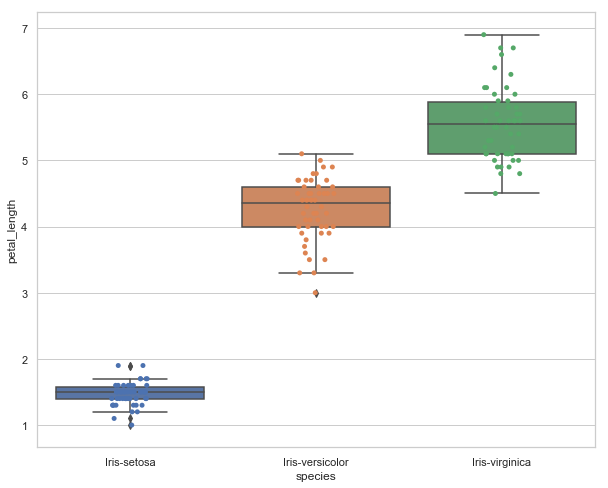

In [31]:
plt.figure(figsize=(10,8))
sns.boxplot(x='species', y = 'petal_length', data = iris)
sns.stripplot(x='species',y = 'petal_length', data = iris, jitter=True, edgecolor='green' )
plt.show()

#### Violin plot - 
The violin plot is used to visualise the distribution of the data and its probability density. The thick black bar in the center represents the interquartile range, the thin black line extended from it represents the 95% confidence intervals, and the white dot is the median.

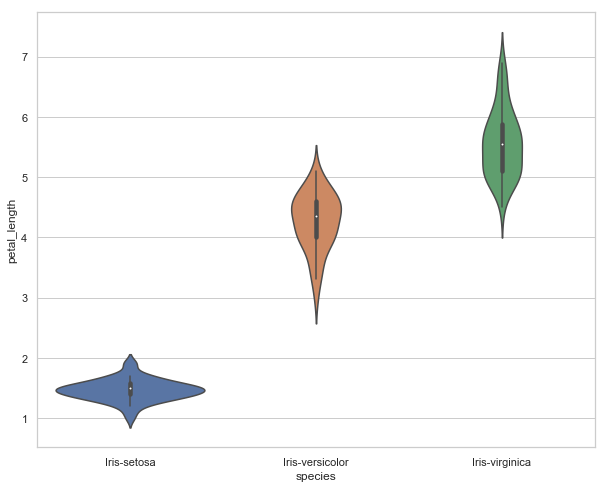

In [33]:
plt.figure(figsize=(10,8))
sns.violinplot(x = 'species', y = 'petal_length', data =iris)
plt.show()

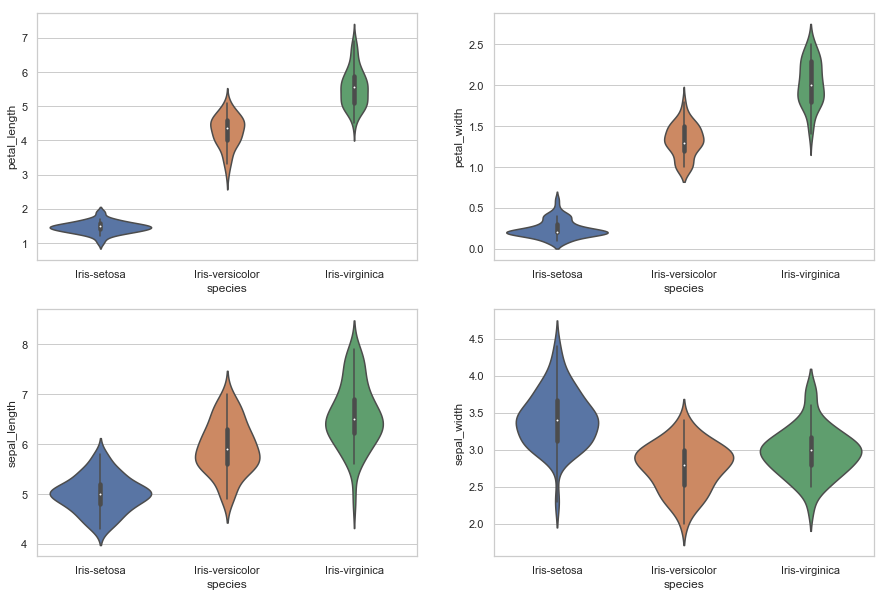

In [35]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='petal_length',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='petal_width',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='sepal_length',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='sepal_width',data=iris)
plt.show()

#### Swarn plot

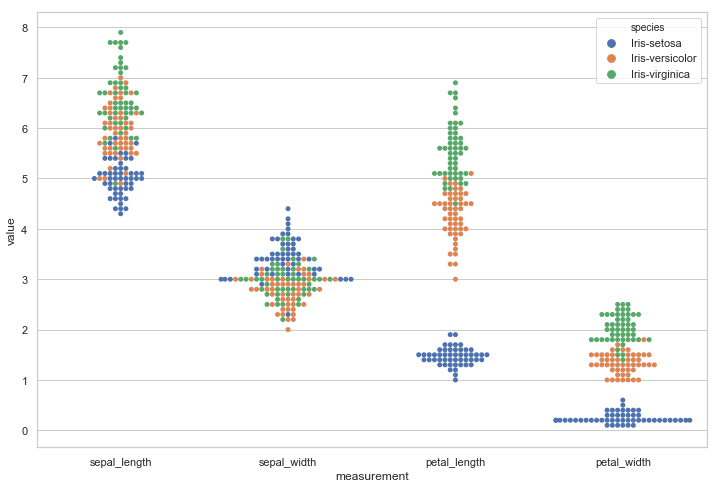

In [45]:
plt.figure(figsize=(12,8))
# "Melt" the dataset
iris2 = pd.melt(iris, "species", var_name="measurement")
# Drawing a categorical scatterplot
sns.swarmplot(x="measurement", y="value", hue="species", data=iris2)
plt.show()